<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/EmergentRegulator001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

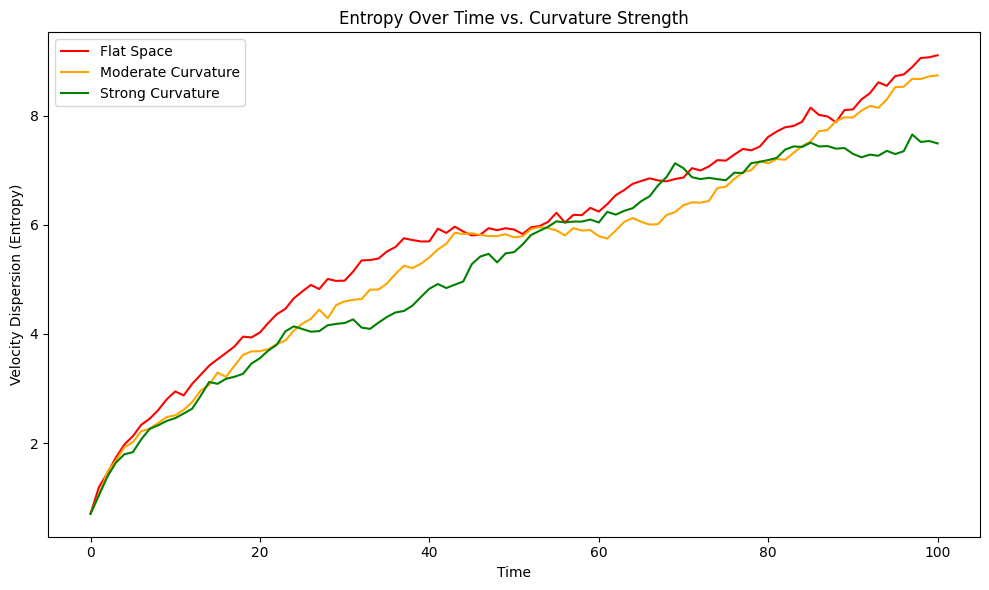

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100
T = 100
x = np.linspace(0, 1, N)
v0 = np.sin(2 * np.pi * x)  # Structured initial velocity

# Curvature field generator
def curvature_field(strength=0.0):
    return strength * np.exp(-((x - 0.5)**2) / 0.01)

# Evolution with curvature-modulated noise
def evolve_with_curvature(v_init, curvature, steps):
    traj = [v_init.copy()]
    v = v_init.copy()
    for _ in range(steps):
        noise = np.random.randn(N) * (1.0 / (1.0 + curvature))
        v += noise
        traj.append(v.copy())
    return np.array(traj)

# Entropy metric
def entropy_metric(traj):
    return [np.std(v) for v in traj]

# Run simulations with increasing curvature
curvatures = [0.0, 2.0, 5.0]
labels = ["Flat Space", "Moderate Curvature", "Strong Curvature"]
colors = ["red", "orange", "green"]

plt.figure(figsize=(10, 6))

for strength, label, color in zip(curvatures, labels, colors):
    C = curvature_field(strength)
    traj = evolve_with_curvature(v0, C, T)
    entropy = entropy_metric(traj)
    plt.plot(entropy, label=label, color=color)

plt.title("Entropy Over Time vs. Curvature Strength")
plt.xlabel("Time")
plt.ylabel("Velocity Dispersion (Entropy)")
plt.legend()
plt.tight_layout()
plt.show()
